In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from ast import literal_eval


from helpers.plot_helper import plot_training_loss



In [2]:
PATH_TO_CSV_FILE_LOGS='/home/jakmic/Projekty/dose3d-phsp/AE_VAE/Lightning_Autoencoders/results/MKMMD_VAE/version_8/metrics.csv'

# Odkomentuj by narysować funkcje dla wielu wersji
# versions=['version_9','version_10']
# files_paths=[os.path.join(f'/home/jakmic/Projekty/dose3d-phsp/AE_VAE/Lightning_Autoencoders/results/BetaVAE/{version}','metrics.csv') for version in versions]

metrics_df = pd.read_csv(PATH_TO_CSV_FILE_LOGS, header=0, squeeze=True)
metrics_df.head()



,train_logs,epoch,step,validation_logs,validation_epoch_end_logs
0,"{'combined_loss': 6.072138786315918, 'mse_loss...",0,0,NaN,NaN
1,"{'combined_loss': 6.311144828796387, 'mse_loss...",0,1,NaN,NaN
2,"{'combined_loss': 6.001986026763916, 'mse_loss...",0,2,NaN,NaN
3,"{'combined_loss': 5.998498916625977, 'mse_loss...",0,3,NaN,NaN
4,"{'combined_loss': 6.712584495544434, 'mse_loss...",0,4,NaN,NaN


In [3]:
train_col_list=["train_logs","epoch","step"]
train_metrics_df=pd.read_csv(PATH_TO_CSV_FILE_LOGS,usecols=train_col_list)

# Odkomentuj by połączyć wiele wersji
# train_metrics_df = pd.concat(map(pd.read_csv, files_paths), ignore_index=True)
# train_metrics_df=train_metrics_df[train_col_list]

train_metrics_df=train_metrics_df[train_metrics_df['train_logs'].notna()]
train_metrics_df=train_metrics_df.reset_index(drop=True)
df = pd.DataFrame([literal_eval(i) for i in train_metrics_df.train_logs.values])
train_metrics_df=pd.concat([train_metrics_df,df],axis=1).drop('train_logs',axis=1)

NUM_EPOCHS=train_metrics_df['epoch'].max()
print(NUM_EPOCHS)

train_metrics_df.head()

99


,epoch,step,combined_loss,mse_loss,mkmmd_loss
0,0,0,6.072139,5.993114,0.079024
1,0,1,6.311145,6.257113,0.054032
2,0,2,6.001986,5.959845,0.042141
3,0,3,5.998499,5.956433,0.042066
4,0,4,6.712584,6.709675,0.002910


In [4]:
val_col_list=["validation_logs","epoch","step","validation_epoch_end_logs"]
val_metrics_df=pd.read_csv(PATH_TO_CSV_FILE_LOGS,usecols=val_col_list)

# Odkomentuj by połączyć wiele wersji
# val_metrics_df = pd.concat(map(pd.read_csv, files_paths), ignore_index=True,)
# val_metrics_df=val_metrics_df[val_col_list]

val_metrics_df=val_metrics_df[val_metrics_df['validation_logs'].notna()]
val_metrics_df=val_metrics_df.reset_index(drop=True)
df = pd.DataFrame([literal_eval(i) for i in val_metrics_df.validation_logs.values])
val_metrics_df=pd.concat([val_metrics_df,df],axis=1).drop('validation_logs',axis=1)
df = pd.DataFrame([literal_eval(i) for i in val_metrics_df.validation_epoch_end_logs.values])
val_metrics_df=pd.concat([val_metrics_df,df],axis=1).drop('validation_epoch_end_logs',axis=1)


val_metrics_df.head()

,epoch,step,combined_loss,mse_loss,mkmmd_loss,avg_val_loss
0,0,763,0.464977,0.335525,0.129451,0.464977
1,1,1527,0.124232,0.105041,0.019191,0.124232
2,2,2291,0.053425,0.049075,0.004350,0.053426
3,3,3055,0.052448,0.049566,0.002882,0.052448
4,4,3819,0.034717,0.032559,0.002158,0.034718


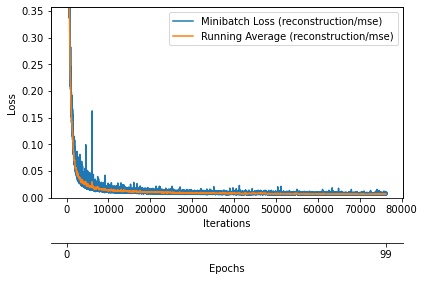

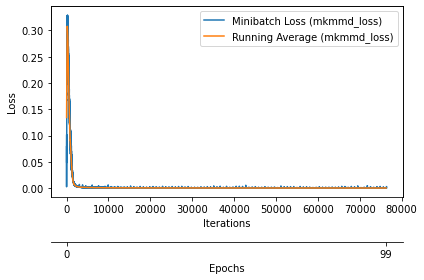

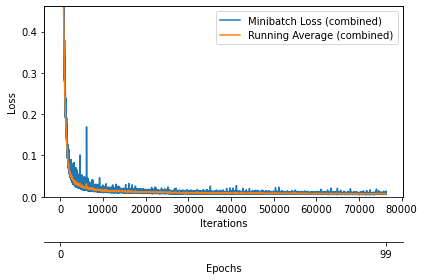

In [6]:
plot_training_loss(train_metrics_df['mse_loss'], NUM_EPOCHS, custom_label=" (reconstruction/mse)")
# plot_training_loss(train_metrics_df['kld_loss'], NUM_EPOCHS, custom_label=" (KL)", set_y_axis_limit=False)
plot_training_loss(train_metrics_df['mkmmd_loss'], NUM_EPOCHS, custom_label=" (mkmmd_loss)", set_y_axis_limit=False)
plot_training_loss(train_metrics_df['combined_loss'], NUM_EPOCHS, custom_label=" (combined)")
plt.show()


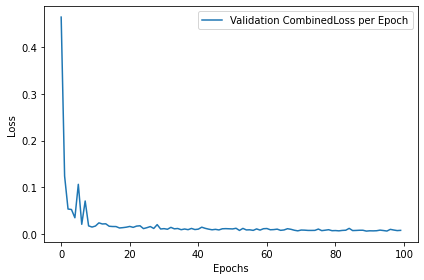

In [7]:
# plt.plot(range(len(val_metrics_df['train_combined_loss_per_epoch'])), (val_metrics_df['train_combined_loss_per_epoch']), label='Train Epoch Loss')
plt.plot(range(len(val_metrics_df['combined_loss'])), (val_metrics_df['combined_loss']), label='Validation CombinedLoss per Epoch')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0.15,0.3)
plt.tight_layout()